In [1]:
!pip install torch-geometric
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.13.1+cu116.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.13.1+cu116.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 32.7 MB/s eta 0:00:00
  Created wheel for torch-geometric: filename=torch_geometric-2.2.0-py3-none-any.whl size=773302 sha256=46d68a46c8a7d0b5ac636c5c9bd45b6b382226bcdb6ac73bba4b69c3f25f1fa2
  Stored in directory: /root/.cache/pip/wheels/59/a3/20/198928106d3169865ae73afcbd3d3d1796cf6b429b55c65378
Successfully built torch-geometric
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.1+cu116.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 36.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import torch
import matplotlib.pyplot as plt


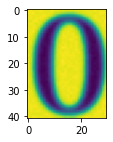

In [71]:
from PIL import Image
img_path = '/content/792.png'
img = Image.open(img_path)
plt.figure(figsize = (15,2))
plt.imshow(img)



In [72]:
print(img.size)  # width and height 
img_array = np.array(img)
# img_array = img_array / 255
img_array.shape

(30, 41)


(41, 30)

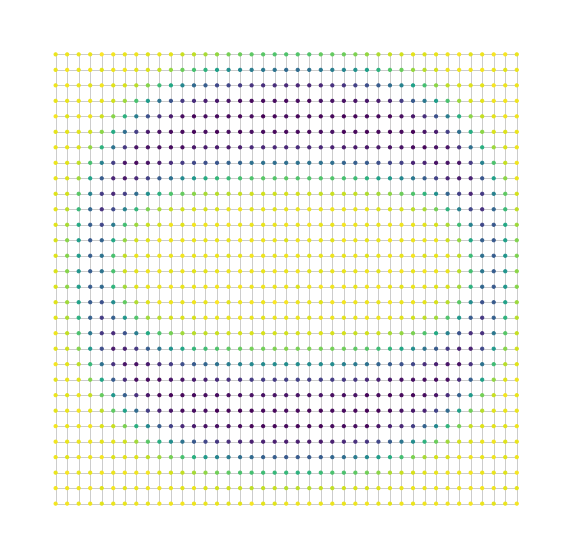

In [78]:
# Add nodes to the graph
G = nx.Graph()
rows, cols= img_array.shape
for i in range(rows):
    for j in range(cols):
        pixel = (img_array[i][j], img_array[i][j], img_array[i][j])
        G.add_node((i, j), rgb = pixel)

# Add edges between adjacent nodes
for i in range(rows):
    for j in range(cols):
        if i < rows-1:
            G.add_edge((i, j), (i+1, j))
        if j < cols-1:
            G.add_edge((i, j), (i, j+1))
            
plt.figure(figsize=(10,10))
pos = {n: n for n in G.nodes()}
nx.draw_networkx_nodes(G, pos, node_size=10, node_color=img.getdata())
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.axis('off')
plt.show()

In [88]:

nodes = []
for node in G.nodes():
  nodes.append(node)
nodes


[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (2, 21),
 (2, 22),
 (2, 23),
 (2, 24),
 (2, 25),
 (2, 26),
 (2, 27),
 (2, 28),
 (2, 29),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),


In [48]:

# create a new graph
G = nx.Graph()
height, width = img_array.shape
for x in range(height):
    for y in range(width):
        # node_label = str(x) + "," + str(y)  # label node with its x,y coordinates
        pixel_value = img_array[x, y]
        G.add_node(pixel_value)


# connect adjacent pixels in the graph with edges
for x in range(height):
    for y in range(width):
        node1_label = img_array[x,y]
        if x < height - 1:
            node2_label = img_array[x+1,y]
            G.add_edge(node1_label, node2_label)
        if y < width - 1:
            node3_label = img_array[x,y+1]
            G.add_edge(node1_label, node3_label)

print(G.nodes)
# plt.figure(figsize = (15,16))
# nx.draw(G)
# plt.show()


[245, 241, 243, 244, 240, 242, 246, 239, 238, 236, 235, 247, 232, 228, 221, 216, 210, 207, 206, 208, 219, 226, 234, 237, 183, 165, 150, 145, 138, 144, 146, 158, 173, 189, 230, 140, 109, 89, 84, 85, 86, 83, 94, 119, 181, 213, 233, 227, 195, 153, 103, 72, 55, 58, 75, 97, 107, 106, 90, 67, 51, 118, 167, 209, 249, 192, 34, 46, 88, 129, 169, 182, 156, 113, 69, 45, 41, 61, 159, 203, 149, 47, 31, 39, 77, 193, 217, 212, 179, 60, 32, 100, 166, 215, 164, 98, 50, 27, 29, 56, 115, 186, 222, 214, 170, 99, 25, 30, 116, 225, 126, 26, 36, 231, 204, 133, 62, 28, 35, 161, 40, 23, 108, 185, 220, 177, 229, 201, 131, 63, 22, 33, 59, 135, 48, 78, 157, 73, 154, 127, 57, 24, 125, 197, 218, 81, 171, 224, 141, 68, 143, 66, 93, 178, 160, 74, 37, 199, 123, 20, 104, 80, 21, 114, 175, 132, 44, 54, 120, 91, 180, 200, 52, 191, 128, 19, 172, 248, 187, 223, 190, 101, 43, 202, 176, 194, 38, 198, 92, 53, 124, 49, 112, 134, 105, 188, 151, 162, 142, 76, 196, 110, 42, 82, 64, 148, 102, 211, 184, 139, 205]


In [62]:
# adding node feature to the graph
img = img.convert('RGB')

for node in G.nodes:
  G.nodes[node]['rgb'] = np.array([node,node,node])

print(G.nodes[(0,0)]['rgb'])

[[0 0]
 [0 0]
 [0 0]]


In [89]:
import torch

# Compute the edges of the graph
edges = []
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        if abs(nodes[i][0] - nodes[j][0]) <= 1 and abs(nodes[i][1] - nodes[j][1]) <= 1:
            edges.append((i, j))

# Convert the edges to a tensor
edge_index = torch.tensor(edges).t().contiguous()

# Print the result
print(edge_index)



tensor([[   0,    0,    0,  ..., 1226, 1227, 1228],
        [   1,   30,   31,  ..., 1227, 1228, 1229]])


In [79]:
# converting the edges into tensor
edge_index = np.array(list(G.edges()), dim = 2)
print(edge_index)
edge_index = torch.from_numpy(edge_index).to(torch.long).t().contiguous()
edge_index

TypeError: ignored

In [80]:

# Assuming the node features are stored as the 'rgb' attribute of each node
# converting attributes to tensor
num_nodes = len(G.nodes())

first_node = next(iter(G))    # get the first node of the graph
num_features = len(G.nodes[first_node]['rgb'])

x = torch.zeros((num_nodes, num_features), dtype=torch.float)
for i, node in enumerate(G.nodes()):
    x[i] = torch.tensor(G.nodes[node]['rgb'], dtype=torch.float)
x



tensor([[245., 245., 245.],
        [245., 245., 245.],
        [241., 241., 241.],
        ...,
        [243., 243., 243.],
        [242., 242., 242.],
        [242., 242., 242.]])

In [ ]:
# assign label to the graph
G.graph['label'] = 2
print(G.graph['label'])

# converting to tensor
y = torch.tensor([G.graph['label']], dtype=torch.long)
y

In [22]:
import torch
import torch.nn.functional as F
# from torch_geometric.datasets import ImageNet
from torch_geometric.data import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import torch_geometric

# Define the GCN model
class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(3, 16) # 3 input channels (for RGB), 16 output channels
        self.conv2 = GCNConv(16, 32) # 16 input channels, 32 output channels
        self.conv3 = GCNConv(32, 64) # 32 input channels, 64 output channels
        self.fc = torch.nn.Linear(64, 10) # 64 input features, 10 output classes
        
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))
        x = global_mean_pool(x, torch.zeros(x.size(0), dtype=torch.long))
        x = self.fc(x)
        return x

# Load the dataset of image graphs
# dataset = ImageNet(root='/path/to/dataset')

# Split the dataset into training and validation sets
# train_dataset = dataset[:1000] # first 1000 graphs for training
# val_dataset = dataset[1000:1200] # next 200 graphs for validation

# Create data loaders for batched processing of the graphs
# train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)   # used when training batches of graphs
# val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)


# Create the GCN model and optimizer
model = GCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model for a few epochs
for epoch in range(10):
    model.train()
    # for data in train_loader:
    # x = x / 255.0       # normalize the RGB values to [0, 1]
    # edge_index = data.edge_index
    optimizer.zero_grad()
    out = model(x, edge_index)
    loss = F.cross_entropy(out,y)
    loss.backward()
    optimizer.step()
    
    # Evaluate the model on the validation set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        # for data in val_loader:
            # x = x / 255.0 # normalize the RGB values to [0, 1]
            # edge_index = data.edge_index
            out = model(x, edge_index)
            pred = out.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += 1
    acc = correct / total
    print(f"Epoch {epoch+1}, val acc = {acc:.4f}")


IndexError: ignored